# IBM Developer Skills Network

# CV Studio - Image classification using KNN

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imutils import paths
import seaborn as sns
import random
import time
from datetime import datetime

In [3]:
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [4]:
import os
from skillsnetwork import cvstudio

# Download images and Annotations

In [ ]:
# This file will run with independent notebook, so not load cvsstudio
#cvstudioClient = cvstudio.CVStudio()

# download all images
#cvstudioClient.downloadAll()

In [20]:
# Link for Annotation files - created by cvs studio
# All images saved to folder 'Images for training\cats_dogs_images\'
import json
path = 'Images for training\cats_dogs_images/'
path_json = path + '_annotations.json'
annotations = json.load(open(path_json))

In [9]:
first_five = {k: annotations["annotations"][k] for k in list(annotations["annotations"])[:5]}
first_five

{'645c2283-a71c-42ee-a841-3a696018eef8.jpg': [{'label': 'dog'}],
 'e95d9b59-1dd8-4747-abb9-bde400b7d25e.jpg': [{'label': 'dog'}],
 'e9d94988-099a-48e9-b6ad-bd939d0b92c0.jpg': [{'label': 'dog'}],
 '1710540b-b4dd-4697-bb7a-8e423fb05b1c.jpg': [{'label': 'dog'}],
 '4dc102a8-4d32-4870-9793-7d1199e33c97.jpg': [{'label': 'dog'}]}

# Load and Plot Image

In [19]:
random_filename = path + random.choice(list(annotations['annotations'].keys()))

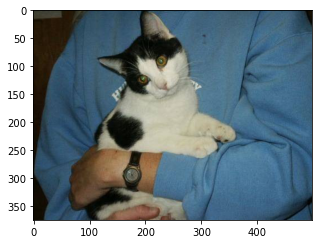

In [21]:
sample_image = cv2.imread(random_filename)
image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
## Now plot the image
plt.figure(figsize=(5,5))
plt.imshow(image, cmap = "gray")
plt.show()

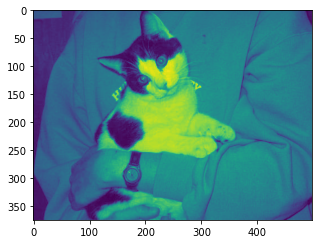

In [22]:
# Convert image to grayscale to reduce computational requirements
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(5, 5))
plt.imshow(sample_image)
plt.show()

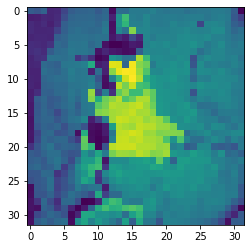

In [23]:
# Resize image to help train faster
sample_image = cv2.resize(sample_image, (32, 32))
plt.imshow(sample_image)
plt.show()

In [24]:
# Flatten image - makes image a numpy array 
pixels = sample_image.flatten()
pixels

array([65, 60, 70, ..., 12, 66, 68], dtype=uint8)

# Repeat the Process for All Images

In [60]:
# Use paths to get images name list from image folder
image_paths = list(paths.list_images(path))
train_images = []
train_labels = []
class_object = annotations['labels']

In [61]:
# Loop over the input images
for (i, image_path) in enumerate(image_paths):
    # read image
    image = cv2.imread(image_path)

    # make images gray
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Label image using the annotations - change dog, cat to 0, 1 
    label = class_object.index(annotations["annotations"][image_path[37:]][0]['label']) # 37 = start position of file name in path
    tmp_label = annotations['annotations'][image_path[37:]][0]['label'] # return dog or cat

    # resize image
    image = cv2.resize(image, (32, 32))

    # flatten the image
    pixels = image.flatten()

    # Add to list
    train_images.append(pixels)
    train_labels.append(label)
    if i<5 or i > 195 : print('Loaded...', '\U0001F483', 'Image', str(i+1), 'is a', tmp_label)
    

Loaded... 💃 Image 1 is a dog
Loaded... 💃 Image 2 is a dog
Loaded... 💃 Image 3 is a cat
Loaded... 💃 Image 4 is a cat
Loaded... 💃 Image 5 is a dog
Loaded... 💃 Image 197 is a cat
Loaded... 💃 Image 198 is a cat
Loaded... 💃 Image 199 is a dog
Loaded... 💃 Image 200 is a cat


Create an array of the train_images and train_labels. <br> OpenCV only identifies arrays of type float32 for the training samples and array of shape (label size, 1) for the training labels. <br> We can do that by specifying astype('float32') on the numpy array of the training samples and convert the training labels to integers and reshape the array to (label size, 1). <br> When you print the train_labels, the array will look like this [[1], [0], ..., [0]]

In [62]:
train_images = np.array(train_images).astype('float32')
train_labels = np.array(train_labels)

In [63]:
train_images.shape # 32*32 = 1024

(200, 1024)

In [64]:
train_labels = train_labels.astype(int)
train_labels = train_labels.reshape(train_labels.size,1)
print(train_labels[:5])

[[0]
 [0]
 [1]
 [1]
 [0]]


## Split data into train and test

In [65]:
test_size = 0.2
train_samples, test_samples, train_labels, test_labels = train_test_split(
    train_images, train_labels, test_size=test_size, random_state=0)

To train the KNN model, we will use the cv2.ml.KNearest_create() from the OpenCV library. <br> We need to define how many nearest neighbors will be used for classification as a hyper-parameter k. <br> This parameter k can be toggled with/tuned in the training or model validation process. <br> Fit the training and test images and get the accuracy score of the model.

We will try multiple values of k to find the optimal value for the dataset we have. <br> k refers to the number of nearest neighbours to include in the majority of the voting process.

In [69]:
start_datetime = datetime.now()

knn = cv2.ml.KNearest_create()
knn.train(train_samples, cv2.ml.ROW_SAMPLE, train_labels)

## get different values of K
k_values = [1, 2, 3, 4, 5]
k_result = []

for k in k_values:
    ret,result,neighbours,dist = knn.findNearest(test_samples,k=k)
    k_result.append(result)
    
flattened = []

for res in k_result:
    flat_result = [item for sublist in res for item in sublist]
    flattened.append(flat_result)

end_datetime = datetime.now()
print('Training Duration: ' + str(end_datetime-start_datetime))

Training Duration: 0:00:00.006001


In [86]:
flattened[:2]

[[1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  1.0],
 [1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  1.0]]

In [70]:
# get accuracy value for each value of k
accuracy_res = []
con_matrix = []  # confusion matrix

for k_res in k_result:
    label_names = [0, 1]
    cmx = confusion_matrix(test_labels, k_res, labels=label_names)
    con_matrix.append(cmx)

    # get values for when predict accurately
    matches = (k_res==test_labels)
    correct = np.count_nonzero(matches)

    # calculate accuracy
    accuracy = correct * 100.0 / result.size
    accuracy_res.append(accuracy)

res_accuracy = {k_values[i]: accuracy_res[i] for i in range(len(k_values))}
list_res = sorted(res_accuracy.items())

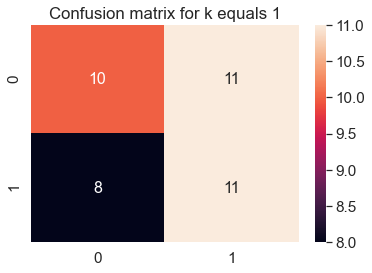

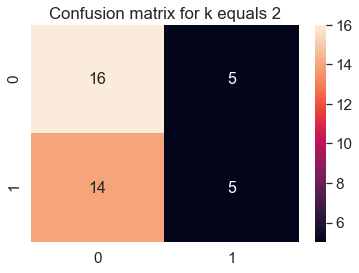

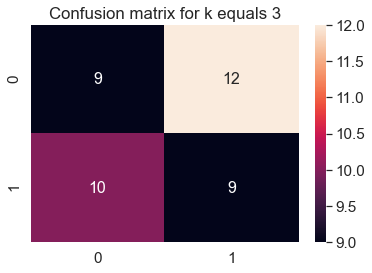

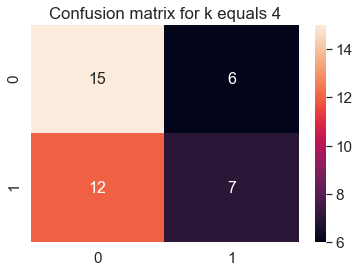

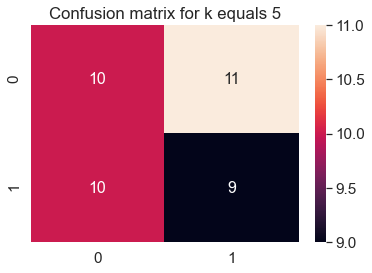

In [71]:
# Let's visualize the confusion matrix (TN, FN, FP, TP)
t=0
for array in con_matrix:
    df_cm = pd.DataFrame(array)
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=True, annot_kws={'size':16}, fmt = '.0f')
    t+=1
    title = 'Confusion matrix for k equals ' + str(t)
    plt.title(title)
    plt.show()

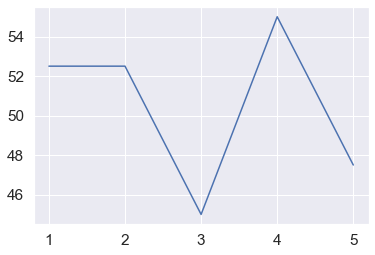

In [72]:
# Plot the accuracy
x, y = zip(*list_res)
plt.plot(x, y)
plt.show()

In [73]:
# Train the model based on the best k value
k_best = max(list_res, key=lambda item: item[1])[0]
k_best

4

# Report the results back to CV Studio

In [ ]:
parameters = {
    'k_best': k_best
}
result = cvstudioClient.report(started=start_datetime, completed=end_datetime, parameters=parameters, accuracy=list_res)

if result.ok:
    print('Congratulations your results have been reported back to CV Studio!')